# Set up

Data source: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

Import libraries and load the data from file

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [2]:
# change the path to make it work for your computer
raw_data = pd.read_csv(r"C:\Users\Admin\Downloads\machine learning\melb_data.csv")

In [3]:
type(raw_data)

pandas.core.frame.DataFrame

In [ ]:
# print out to make sure it loaded
# how do you print out fewer/more rows?
raw_data.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [4]:
raw_data['Rooms']

0        2
1        2
2        3
3        3
4        4
        ..
13575    4
13576    3
13577    3
13578    4
13579    4
Name: Rooms, Length: 13580, dtype: int64

In [7]:
raw_data[['Rooms', 'Bathroom']]

,Rooms,Bathroom
0,2,1.0
1,2,1.0
2,3,2.0
3,3,2.0
4,4,1.0
...,...,...
13575,4,2.0
13576,3,2.0
13577,3,2.0
13578,4,1.0


In [8]:
raw_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [9]:
# num rows = num data point
len(raw_data)

13580

In [10]:
raw_data.shape

(13580, 21)

In [15]:
list(raw_data)

['Suburb',
 'Address',
 'Rooms',
 'Type',
 'Price',
 'Method',
 'SellerG',
 'Date',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'CouncilArea',
 'Lattitude',
 'Longtitude',
 'Regionname',
 'Propertycount']

In [11]:
raw_data.isna()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13576,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
13577,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False
13578,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [14]:
raw_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [16]:
raw_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

# Getting to know your data

Use the Pandas package and the dataset documentation to answer some basic questions about the dataset:
- How many data points are there?
- What does one data point represent?
- Do you know what each feature means?
- Are there missing values? How many and for which features?
- Which column would make sense to use as a label for prediction?
- What is the datatype of each feature? Make any conversions you think are necessary.

# Data Exploration

Decide how to handle the missing values you identified in the last part.

In [17]:
#remove columns
to_drop = ['BuildingArea', 'YearBuilt', 'CouncilArea']
clean_data = raw_data.drop(columns=to_drop)

In [18]:
clean_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,-37.85908,144.89299,Western Metropolitan,6380.0


In [20]:
imputer = SimpleImputer(strategy='median')
imputer.fit_transform(X=clean_data['Car'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [21]:
missing_car = clean_data['Car'].isna()
clean_data.loc[missing_car]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,Lattitude,Longtitude,Regionname,Propertycount
12221,Ascot Vale,132 The Parade,3,h,985000.0,S,Brad,3/09/2017,4.3,3032.0,3.0,1.0,NaN,245.0,-37.77215,144.91144,Western Metropolitan,6567.0
12247,Brunswick East,18 Ethel St,2,h,1023000.0,S,Domain,3/09/2017,4.0,3057.0,2.0,1.0,NaN,154.0,-37.77221,144.97537,Northern Metropolitan,5533.0
12259,Clifton Hill,34 Fenwick St,3,h,1436000.0,S,Jellis,3/09/2017,3.6,3068.0,3.0,2.0,NaN,123.0,-37.78888,145.00036,Northern Metropolitan,2954.0
12320,Glen Waverley,19 Diamond Av,3,h,1370000.0,S,Fletchers,3/09/2017,16.7,3150.0,3.0,1.0,NaN,652.0,-37.87170,145.17267,Eastern Metropolitan,15321.0
12362,Newport,11 Collingwood Rd,4,h,1180000.0,PI,Williams,3/09/2017,6.2,3015.0,4.0,1.0,NaN,545.0,-37.84399,144.89125,Western Metropolitan,5498.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13496,Moonee Ponds,46 Eglinton St,4,h,1525000.0,S,Nelson,26/08/2017,6.2,3039.0,4.0,3.0,NaN,233.0,-37.76884,144.91708,Western Metropolitan,6232.0
13508,North Melbourne,9 Erskine St,2,h,1080000.0,S,Jellis,26/08/2017,1.8,3051.0,2.0,1.0,NaN,100.0,-37.79524,144.94642,Northern Metropolitan,6821.0
13522,Port Melbourne,201 Stokes St,2,h,1515000.0,SP,Marshall,26/08/2017,3.5,3207.0,2.0,2.0,NaN,197.0,-37.83754,144.93954,Southern Metropolitan,8648.0
13524,Prahran,17 Packington Pl,2,h,1365000.0,S,Jellis,26/08/2017,4.6,3181.0,2.0,1.0,NaN,206.0,-37.85569,145.00522,Southern Metropolitan,7717.0


In [24]:
car_median = clean_data.loc[~missing_car]['Car'].median()

In [25]:
clean_data.loc[missing_car, 'Car'] = car_median

In [26]:
clean_data['Car'].isna().sum()

0

What's the distribution of housing prices? Do any seem unreasonably high or low to you? Decide how you want to handle outliers and update your dataset accordingly.

In [27]:
clean_data['Price'].describe()

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
25%      6.500000e+05
50%      9.030000e+05
75%      1.330000e+06
max      9.000000e+06
Name: Price, dtype: float64

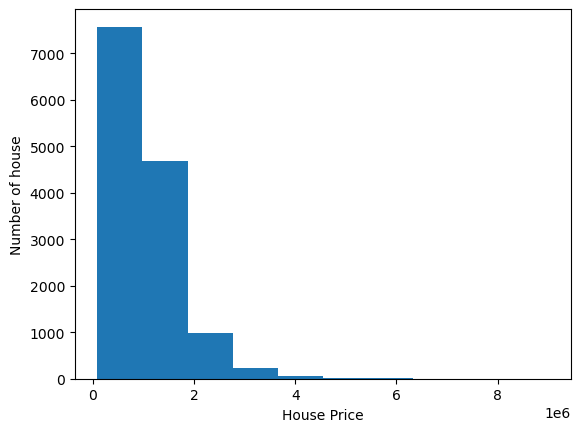

In [29]:
plt.hist(clean_data['Price'])
plt.xlabel('House Price')
plt.ylabel('Number of house')
plt.show()

In [30]:
price = clean_data['Price']

p_mean = price.mean()
p_sd = price.std()

print(p_mean,p_sd)

1075684.079455081 639310.7242960194


In [33]:
print(p_mean + 3 * p_sd)
p_cutoff = p_mean + 3 * p_sd

2993616.252343139


anything more than 3 million is outlier, we can take out

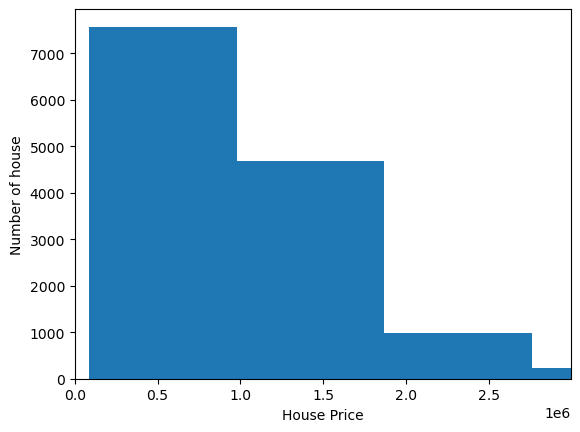

In [34]:
plt.hist(clean_data['Price'])
plt.xlabel('House Price')
plt.ylabel('Number of house')
plt.xlim(0,p_cutoff)
plt.show()

In [37]:
high_price = price > p_cutoff
clean_data = clean_data.loc[~high_price]

In [38]:
clean_data['Price'].describe()

count    1.334800e+04
mean     1.029080e+06
std      5.247472e+05
min      8.500000e+04
25%      6.450000e+05
50%      9.000000e+05
75%      1.305000e+06
max      2.990000e+06
Name: Price, dtype: float64

Calculate how many properties were sold in each month. Display these values as (1) a bar chart and (2) a line chart. Which one makes more sense to you?

This dataset includes two different features with the number of bedrooms. Make a scatter plot of one vs. the other to see the relationship. Would would a perfect correspondance look like? What is your plot telling you?

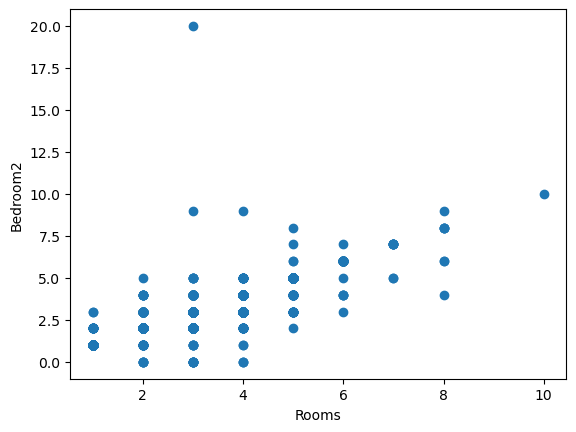

In [40]:
plt.scatter(x=clean_data['Rooms'], y =clean_data['Bedroom2'])
plt.xlabel('Rooms')
plt.ylabel('Bedroom2')
plt.show()

Look at how the number of bedrooms, number of bathrooms, land size, and building area correlate with property price. What kind of relationships do you see? Do any of these features give you more information about price than the others?

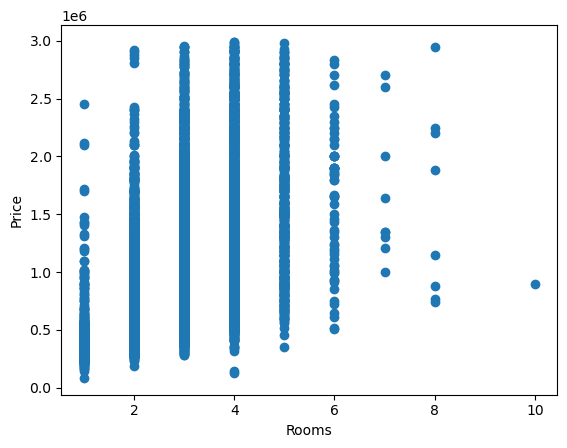

In [41]:
plt.scatter(x=clean_data['Rooms'], y=clean_data['Price'])
plt.xlabel('Rooms')
plt.ylabel('Price')
plt.show()

Do the answers to the previous part change if you normalized the housing prices to a mean of 0 with standard deviation 1?

# If you have more time

Pick another question you are curious about relating to the dataset. Now do some code to answer it!

In [ ]:
# add cells for code and text here